# Import libraries

In [1]:
# Import libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Read the data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
data_folder = '/content/drive/My Drive/LifeHack 2020/eyes_dataset'
train_dir = os.path.join( data_folder, 'train' )
val_dir = os.path.join( data_folder, 'val')
test_dir = os.path.join( data_folder, 'test' )

In [4]:
batch_size = 16
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Data Augmentation

In [5]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    zoom_range=0.15,
                    shear_range=0.1
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 433 images belonging to 4 classes.


In [6]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 108 images belonging to 4 classes.


In [7]:
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 4 classes.


# Model

In [8]:
input_shape = (IMG_HEIGHT, IMG_WIDTH ,3)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [11]:
total_train = len(os.listdir(train_dir))
total_val = len(os.listdir(val_dir))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto', restore_best_weights=True)

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val,
    callbacks=[callback]
)

Epoch 1/100
4/4 [==============================] - 54s 13s/step - loss: 18.0780 - accuracy: 0.1837 - val_loss: 1.2615 - val_accuracy: 0.5625
Epoch 2/100
4/4 [==============================] - 37s 9s/step - loss: 1.2304 - accuracy: 0.6122 - val_loss: 1.3782 - val_accuracy: 0.5156
Epoch 3/100
4/4 [==============================] - 36s 9s/step - loss: 1.3072 - accuracy: 0.7344 - val_loss: 1.3081 - val_accuracy: 0.5312
Epoch 4/100
4/4 [==============================] - 22s 5s/step - loss: 1.4700 - accuracy: 0.2500 - val_loss: 1.3029 - val_accuracy: 0.5469
Epoch 5/100
4/4 [==============================] - 26s 7s/step - loss: 1.3358 - accuracy: 0.4844 - val_loss: 1.2914 - val_accuracy: 0.5156
Epoch 6/100
4/4 [==============================] - 35s 9s/step - loss: 1.3167 - accuracy: 0.6327 - val_loss: 1.3094 - val_accuracy: 0.4688
Epoch 7/100
4/4 [==============================] - 28s 7s/step - loss: 1.5651 - accuracy: 0.1250 - val_loss: 1.2918 - val_accuracy: 0.5938


Saving the model

In [ ]:
save_location = os.path.join( data_folder, 'model')
model.save(save_location)

# Accuracy of Model

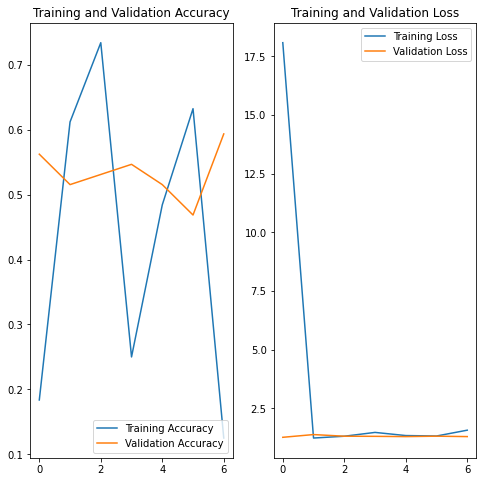

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the model

In [13]:
score = model.evaluate(test_data_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 22s 5s/step - loss: 1.3782 - accuracy: 0.5000
Test loss: 1.3782343864440918
Test accuracy: 0.5
